# 1. 룰 베이스를 기반으로 한 계산 및 도출
- +2점부터 -2점까지의 계산법을 바탕으로, 4가지 기준의 유형을 도출해내는 방식
- 각 유형이 만점대비 몇점인지 체크 필요(e.g. MBTI 기준으로 E와 I를 구분한다면, max 10, min -10에서, 이 사람의 유형은 3점으로 E)
- 퓨처인사이트 자체 홈페이지에 연동할 수 있게 전달하려면, 어떻게 파일형태로 진행하는게 좋을지 감안 필요

### 입력 데이터 형태
- 데이터는 레이블링이 없는 형태의 표 형태여야 함
- 데이터는 모두 정수형

In [4]:
import pandas as pd

df = pd.read_excel("./data/futureinsight_labelingdata_final.xlsx").iloc[:,:-4]
df = df.iloc[:,:-4] # 레이블링 컬럼은 제거(마지막 4개 제거)
df

,No,연령,MBTI,직업,Q1-1,Q1-2,Q1-3,Q1-4,Q1-5,Q2-1,...,Q4-4,Q4-5,Q22,Q24,Q26,Q30,Q31,Q32,Q33,Q34
0,1,4,2,1,5,4,3,5,4,5,...,5,2,1,4,1,2,1,1,3,3
1,2,3,2,1,4,5,4,5,4,5,...,5,4,1,2,1,1,1,1,4,3
2,3,5,7,1,4,5,3,4,3,2,...,3,4,1,3,1,1,4,1,4,5
3,4,4,17,4,3,4,4,3,2,2,...,2,4,1,7,2,1,2,4,3,2
4,5,5,7,4,4,5,3,4,3,4,...,3,4,1,5,2,1,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5,17,1,2,5,4,2,3,5,...,4,4,2,5,2,1,1,1,3,3
4996,4997,3,2,7,5,4,2,2,2,1,...,4,4,1,5,3,1,2,5,4,1
4997,4998,4,17,6,3,3,2,3,2,5,...,1,3,2,3,3,3,1,5,5,5
4998,4999,4,12,1,3,5,2,5,2,1,...,5,4,1,5,1,1,3,1,4,4


### 룰 베이스 기반 성향 판별 모듈
- 데이터프레임과 질문 리스트(q_lst)를 넣으면 해당 질문들의 스코어가 높으면 높은 성향으로, 낮으면 낮은 성향으로 도출하는 모듈
- q_lst 배열에 있는 문자열을 포함하는 컬럼만을 추출해서 계산하는 형식
    - ex1) q_lst = ["Q1"] -> Q_1, Q_2, Q_3, Q_4, Q_5
    - ex2) q_lst = ["Q2", "Q3-2", "Q4-1"] -> Q2-1, Q2-2, Q2-3, Q2-4, Q2-5, Q3-2, Q4-1

In [23]:
def calculate_type(df, q_lst):
    selected_cols = []
    for q in q_lst:
        cols = [col for col in df.columns if q in col]
        selected_cols += cols
        
    neutral_point = 3
    standard_point = neutral_point * len(selected_cols)

    result_lst = []
    for i in range(0, len(df)):
        df_i = df.iloc[i][selected_cols]
        point_i = df_i.sum()
        
        if point_i == standard_point:
            type = "NEUTRAL"
        elif point_i > standard_point:
            type = "HIGH"
        else:
            type = "LOW"
        result_lst.append(type)
    return result_lst

- Q1에 해당하는 5개만 계산

In [24]:
df = pd.read_excel("./data/futureinsight_labelingdata_final.xlsx").iloc[:,:-4]
q_lst = ["Q1"]

# 계산
result_lst = calculate_type(df, q_lst)
result_lst

['HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'NEUTRAL',
 'HIGH',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'NEUTRAL',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'LOW',
 'NEUTRAL',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'NEUTRAL',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'NEUTRAL',
 'HIGH',
 'NEUTRAL',
 'NEUTRAL',
 'HIGH',
 'LOW',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'LOW',
 'HIGH',
 'HIGH',
 'HIGH',
 'HIGH',
 'LOW',
 'LOW',
 'HIGH',
 'HIGH',
 'NEUTRAL

- 넣은 데이터프레임 수만큼의 레이블링 결과가 도출됨

In [25]:
len(result_lst)

5000

# 2. AI솔루션 기반으로 한 도출 방식
- 전체 답변과 레이블링한 결과를 한번에 넣고, 4가지 기준의 유형을 도출해내는 방식
- 향후 퓨처인사이트 대표님의 레이블링으로 재학습시켜야할 수도 있어서, 이 부분 고려 필요
- 퓨처인사이트 자체 홈페이지에 연동할 수 있게 전달하려면, 어떻게 파일형태로 진행하는게 좋을지 감안 필요 

In [26]:
from sklearn.ensemble import RandomForestClassifier

### 모델은 앙상블 계열에서 가볍고 성능이 좋은 RandomForest 분류를 사용

#### 1. 배깅(Bagging)이란?
배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

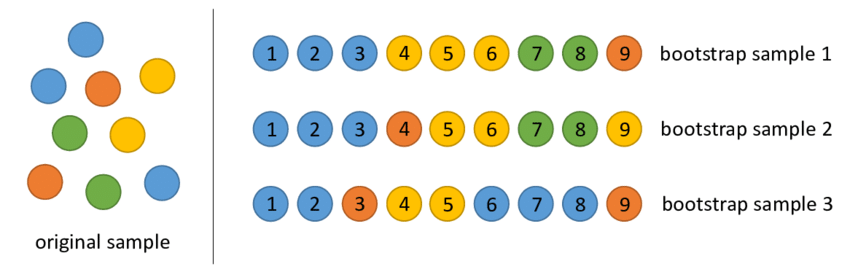

- (1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성
- (2) 각각의 분류기는 부트스트래핑(Bootstrapping)방식으로 생성된 샘플데이터를 학습
- (3) 최종적으로 모든 분류기가 보팅을 통헤 예측 결정
- ※ 부트스트래핑 샘플링은 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식

#### 2. 랜덤포레스트(RandomForest)
랜덤 포레스트는 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘

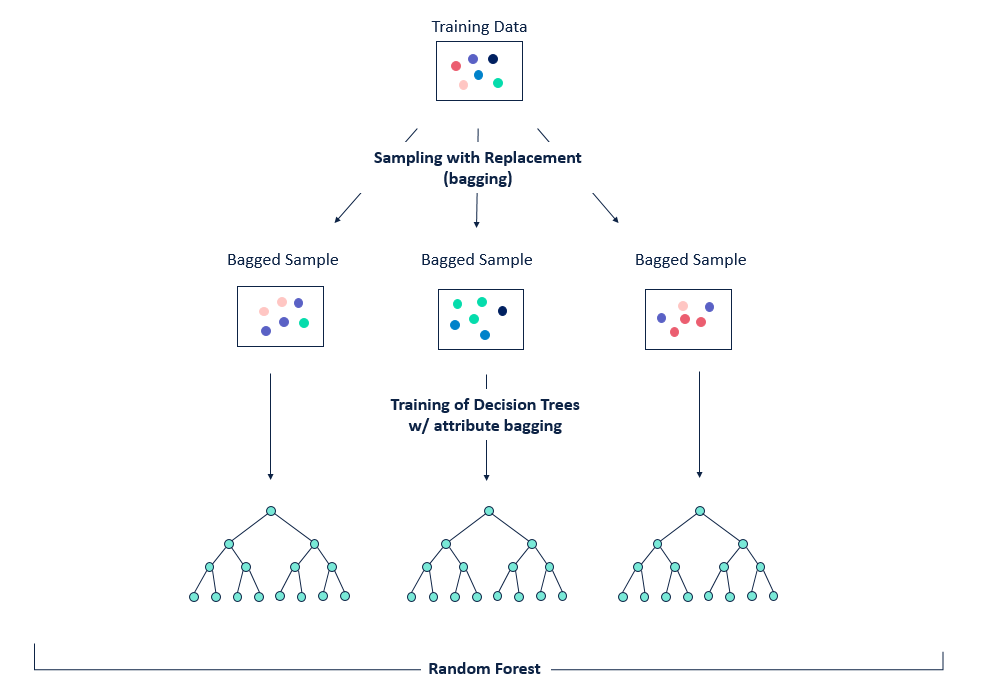

- 장점
    - 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
    - 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
    - 다양한 분야에서 좋은 성능을 나타냄

### (학습) 입력 데이터 형태 
- 데이터는 레이블링이 **있는** 형태의 표 형태여야 함
- 데이터는 모두 정수형
- 응답 컬럼이 무엇이고, 레이블링 컬럼이 무엇인지 배열 형태로 정의해주어야 함

In [35]:
train_df = pd.read_excel("./data/futureinsight_labelingdata_final.xlsx")
train_df

,No,연령,MBTI,직업,Q1-1,Q1-2,Q1-3,Q1-4,Q1-5,Q2-1,...,Q26,Q30,Q31,Q32,Q33,Q34,Q1_레이블링,Q2_레이블링,Q3_레이블링,Q4_레이블링
0,1,4,2,1,5,4,3,5,4,5,...,1,2,1,1,3,3,4,4,5,4
1,2,3,2,1,4,5,4,5,4,5,...,1,1,1,1,4,3,5,4,4,4
2,3,5,7,1,4,5,3,4,3,2,...,1,1,4,1,4,5,4,3,4,3
3,4,4,17,4,3,4,4,3,2,2,...,2,1,2,4,3,2,3,3,3,3
4,5,5,7,4,4,5,3,4,3,4,...,2,1,3,4,3,2,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5,17,1,2,5,4,2,3,5,...,2,1,1,1,3,3,4,3,4,4
4996,4997,3,2,7,5,4,2,2,2,1,...,3,1,2,5,4,1,3,4,3,3
4997,4998,4,17,6,3,3,2,3,2,5,...,3,3,1,5,5,5,3,4,3,3
4998,4999,4,12,1,3,5,2,5,2,1,...,1,1,3,1,4,4,4,4,4,3


### 모델 학습 모듈
- 응답 컬럼, 레이블링 컬럼, 학습 데이터프레임, 모델명 파라미터로 사용
- 실행시 ./model/모델명.pkl 로 모델이 저장됨

In [41]:
# 응답 컬럼 정의
answer_cols = df.columns[:-4]
# 레이블링 컬럼 정의
labels = ["Q1_레이블링", "Q2_레이블링", "Q3_레이블링", "Q4_레이블링"]
# 모델명 정의
model_name = "model_2023_11_01"

print("응답 컬럼:", answer_cols)
print("레이블링 컬럼:", labels)
print("모델명:", model_name)

응답 컬럼: Index(['No', '연령', 'MBTI', '직업', 'Q1-1', 'Q1-2', 'Q1-3', 'Q1-4', 'Q1-5',
       'Q2-1', 'Q2-2', 'Q2-3', 'Q2-4', 'Q2-5', 'Q3-1', 'Q3-2', 'Q3-3', 'Q3-4',
       'Q3-5', 'Q4-1', 'Q4-2', 'Q4-3', 'Q4-4', 'Q4-5', 'Q22', 'Q24', 'Q26',
       'Q30', 'Q31', 'Q32', 'Q33', 'Q34'],
      dtype='object')
레이블링 컬럼: ['Q1_레이블링', 'Q2_레이블링', 'Q3_레이블링', 'Q4_레이블링']
모델명: model_2023_11_01


In [44]:
import joblib

def train_model(answer_cols, labels, train_df, model_name):
    X_train = train_df[answer_cols]
    y_train = train_df[labels]
    
    # 모델 학습
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # 모델 저장
    path = f"./model/{model_name}.pkl"
    joblib.dump(clf, path)
    return clf

In [45]:
clf = train_model(answer_cols=answer_cols, labels=labels, train_df=train_df, model_name=model_name)

### (추론) 입력 데이터 형태
- 데이터는 레이블링이 **없는** 형태의 표 형태여야 함
- 데이터는 모두 정수형
- 레이블링 컬럼을 제외하고, **학습 데이터와 동일한 컬럼** 형태여야 함

In [49]:
test_df = pd.read_excel("./data/futureinsight_labelingdata_final.xlsx").iloc[:,:-4] # 테스트를 위해 레이블링 제거
test_df

,No,연령,MBTI,직업,Q1-1,Q1-2,Q1-3,Q1-4,Q1-5,Q2-1,...,Q4-4,Q4-5,Q22,Q24,Q26,Q30,Q31,Q32,Q33,Q34
0,1,4,2,1,5,4,3,5,4,5,...,5,2,1,4,1,2,1,1,3,3
1,2,3,2,1,4,5,4,5,4,5,...,5,4,1,2,1,1,1,1,4,3
2,3,5,7,1,4,5,3,4,3,2,...,3,4,1,3,1,1,4,1,4,5
3,4,4,17,4,3,4,4,3,2,2,...,2,4,1,7,2,1,2,4,3,2
4,5,5,7,4,4,5,3,4,3,4,...,3,4,1,5,2,1,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,5,17,1,2,5,4,2,3,5,...,4,4,2,5,2,1,1,1,3,3
4996,4997,3,2,7,5,4,2,2,2,1,...,4,4,1,5,3,1,2,5,4,1
4997,4998,4,17,6,3,3,2,3,2,5,...,1,3,2,3,3,3,1,5,5,5
4998,4999,4,12,1,3,5,2,5,2,1,...,5,4,1,5,1,1,3,1,4,4


In [50]:
# 저장했던 모델명 지정
model_name = "model_2023_11_01"
print("모델명:", model_name)

모델명: model_2023_11_01


In [51]:
def use_model(test_df, model_name):
    # 모델 로드
    path = f"./model/{model_name}.pkl"
    loaded_model = joblib.load(path)
    
    # 로드한 모델로 예측 수행
    pred = loaded_model.predict(test_df)
    return pred

In [52]:
result_lst = use_model(test_df=test_df, model_name="model_2023_11_01")
result_lst

array([[4, 4, 5, 4],
       [5, 4, 4, 4],
       [4, 3, 4, 3],
       ...,
       [3, 4, 3, 3],
       [4, 4, 4, 3],
       [4, 4, 4, 4]])

In [53]:
len(result_lst)

5000